In [31]:
%pip install snowflake-connector-python==2.3.5

Note: you may need to restart the kernel to use updated packages.


In [84]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, './scripts')
from snowflakeDbConnector import SnowflakeDbConnector

In [85]:
client = 'colgate'
snowflake_db_connector = SnowflakeDbConnector()
database_query = f'''
        use database brands_{client};
        '''
snowflake_db_connector.getResultForQuery(database_query)

,status
0,Statement executed successfully.


In [3]:
# dataframe_query = f'''
#         select * from ams.keywords_report limit 1000;
#         '''
dataframe_query = f'''
        select CLICKS,IMPRESSIONS,COST,ATTRIBUTEDCONVERSIONS30D,
        ATTRIBUTEDCONVERSIONS30DSAMESKU,ATTRIBUTEDUNITSORDERED30D,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES30DSAMESKU
        from ams.keywords_report 
        order by clicks desc
        limit 2000;
        '''
keywords_report_df = snowflake_db_connector.getResultForQuery(dataframe_query)

In [4]:
keywords_report_df

,CLICKS,IMPRESSIONS,COST,ATTRIBUTEDCONVERSIONS30D,ATTRIBUTEDCONVERSIONS30DSAMESKU,ATTRIBUTEDUNITSORDERED30D,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES30DSAMESKU
0,3472,256635,55925.79,639.00,605.00,691.00,30716.11,29935.64
1,2733,444632,72222.09,511.00,494.00,526.00,33322.53,32887.29
2,2004,155000,23999.80,325.00,311.00,348.00,17180.66,16874.64
3,1967,226192,26268.31,286.00,273.00,293.00,20101.43,19773.71
4,1682,137701,20716.65,1082.00,794.00,1122.00,12890.87,10596.63
...,...,...,...,...,...,...,...,...
1995,150,8910,2216.75,26.00,26.00,28.00,1209.48,1209.48
1996,150,11886,653.09,82.00,79.00,82.00,1214.81,1175.90
1997,150,24077,169.87,85.00,69.00,91.00,1042.37,918.36
1998,150,1076,76.69,107.00,90.00,118.00,1010.57,796.00


In [5]:
keywords_report_df.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   CLICKS                           int64 
 1   IMPRESSIONS                      int64 
 2   COST                             object
 3   ATTRIBUTEDCONVERSIONS30D         object
 4   ATTRIBUTEDCONVERSIONS30DSAMESKU  object
 5   ATTRIBUTEDUNITSORDERED30D        object
 6   ATTRIBUTEDSALES30D               object
 7   ATTRIBUTEDSALES30DSAMESKU        object
dtypes: int64(2), object(6)
memory usage: 125.1+ KB


In [9]:
keywords_report_df['COST']=keywords_report_df['COST'].astype(str).astype(float)
keywords_report_df['IMPRESSIONS']=keywords_report_df['IMPRESSIONS'].astype(str).astype(float)
keywords_report_df['CLICKS']=keywords_report_df['CLICKS'].astype(str).astype(float)
keywords_report_df['ATTRIBUTEDCONVERSIONS30D']=keywords_report_df['ATTRIBUTEDCONVERSIONS30D'].astype(str).astype(float)
keywords_report_df['ATTRIBUTEDCONVERSIONS30DSAMESKU']=keywords_report_df['ATTRIBUTEDCONVERSIONS30DSAMESKU'].astype(str).astype(float)
keywords_report_df['ATTRIBUTEDUNITSORDERED30D']=keywords_report_df['ATTRIBUTEDUNITSORDERED30D'].astype(str).astype(float)
keywords_report_df['ATTRIBUTEDSALES30D']=keywords_report_df['ATTRIBUTEDSALES30D'].astype(str).astype(float)
keywords_report_df['ATTRIBUTEDSALES30DSAMESKU']=keywords_report_df['ATTRIBUTEDSALES30DSAMESKU'].astype(str).astype(float)


<AxesSubplot:>

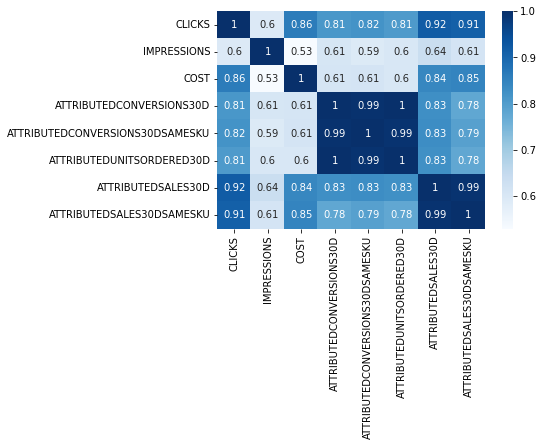

In [10]:
import seaborn as sb
corr = keywords_report_df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

,CLICKS,IMPRESSIONS,COST,ATTRIBUTEDCONVERSIONS30D,ATTRIBUTEDCONVERSIONS30DSAMESKU,ATTRIBUTEDUNITSORDERED30D,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES30DSAMESKU
CLICKS,1.00,0.60,0.86,0.81,0.82,0.81,0.92,0.91
IMPRESSIONS,0.60,1.00,0.53,0.61,0.59,0.60,0.64,0.61
COST,0.86,0.53,1.00,0.61,0.61,0.60,0.84,0.85
ATTRIBUTEDCONVERSIONS30D,0.81,0.61,0.61,1.00,0.99,1.00,0.83,0.78
ATTRIBUTEDCONVERSIONS30DSAMESKU,0.82,0.59,0.61,0.99,1.00,0.99,0.83,0.79
ATTRIBUTEDUNITSORDERED30D,0.81,0.60,0.60,1.00,0.99,1.00,0.83,0.78
ATTRIBUTEDSALES30D,0.92,0.64,0.84,0.83,0.83,0.83,1.00,0.99
ATTRIBUTEDSALES30DSAMESKU,0.91,0.61,0.85,0.78,0.79,0.78,0.99,1.00


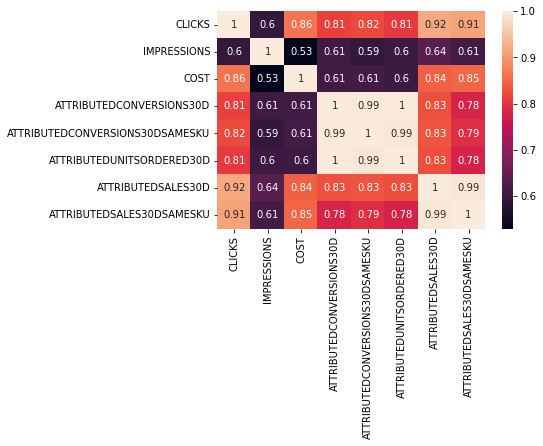

In [11]:
import seaborn as sns
Var_Corr = keywords_report_df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
 
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [26]:
# dataframe_query = f'''
#         select * from ams.keywords_report limit 1000;
#         '''
dataframe_query = f'''
        select PROFILE_ID,count(*) from ams.keywords_report 
        group by PROFILE_ID
        order by count(*) desc
        limit 2000;
        '''
keywords_report_df = snowflake_db_connector.getResultForQuery(dataframe_query)
keywords_report_df

,PROFILE_ID,COUNT(*)
0,1414667831379156,1358076
1,48152324644388,1209743


_**TABLE 2**_

In [45]:
dataframe_query = f'''
        select *
        from ams.keywords_headline_report
        limit 2000;
        '''
keywords_report_df2 = snowflake_db_connector.getResultForQuery(dataframe_query)
keywords_report_df2

,CLIENT_ID,PROFILE_ID,KEYWORD_ID,ATTRIBUTEDCONVERSIONS1DSAMESKU,ATTRIBUTEDSALES7D,ATTRIBUTEDSALES30D,COST,ATTRIBUTEDSALES1D,ATTRIBUTEDCONVERSIONS1D,ATTRIBUTEDSALES7DSAMESKU,...,VERSION_ID,KEYWORDBID,KEYWORDSTATUS,ATTRIBUTEDORDERRATENEWTOBRAND14D,ATTRIBUTEDORDERSNEWTOBRAND14D,ATTRIBUTEDORDERSNEWTOBRANDPERCENTAGE14D,ATTRIBUTEDSALESNEWTOBRAND14D,ATTRIBUTEDSALESNEWTOBRANDPERCENTAGE14D,ATTRIBUTEDUNITSORDEREDNEWTOBRAND14D,ATTRIBUTEDUNITSORDEREDNEWTOBRANDPERCENTAGE14D
0,850,1414667831379156,144122547976308036,None,None,None,0E-10,None,None,None,...,850_20201201_2630912,2.2999900000,Enabled,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10
1,850,1414667831379156,144355225162523091,None,None,None,0E-10,None,None,None,...,850_20201201_2630912,1.8000000000,Enabled,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10
2,850,1414667831379156,144377968980274866,None,None,None,0E-10,None,None,None,...,850_20201201_2630912,2.0000000000,Enabled,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10
3,850,1414667831379156,144262267785451654,None,None,None,0E-10,None,None,None,...,850_20201201_2630912,7.0100000000,Enabled,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10
4,850,1414667831379156,144324003981629770,None,None,None,0E-10,None,None,None,...,850_20201201_2630912,2.0000000000,Enabled,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,850,1414667831379156,144146025511435444,None,None,None,0E-10,None,None,None,...,850_20201201_2630912,1.0000000000,Enabled,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10
1996,850,1414667831379156,144364011337483245,None,None,None,0E-10,None,None,None,...,850_20201201_2630912,1.5000000000,Enabled,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10
1997,850,1414667831379156,144220701648835161,None,None,None,0E-10,None,None,None,...,850_20201201_2630912,4.5000000000,Enabled,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10
1998,850,1414667831379156,144214329689922115,None,None,None,0E-10,None,None,None,...,850_20201201_2630912,4.0000000000,Enabled,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10,0E-10


In [58]:

dataframe_query = f'''
        select 
        KEYWORDBID,IMPRESSIONS,CLICKS,COST,ATTRIBUTEDSALES14DSAMESKU,ATTRIBUTEDCONVERSIONS14D,
        ATTRIBUTEDCONVERSIONS14DSAMESKU,ATTRIBUTEDSALES14D,ATTRIBUTEDORDERRATENEWTOBRAND14D,ATTRIBUTEDORDERSNEWTOBRAND14D,ATTRIBUTEDORDERSNEWTOBRANDPERCENTAGE14D,ATTRIBUTEDSALESNEWTOBRAND14D,
        ATTRIBUTEDSALESNEWTOBRANDPERCENTAGE14D,ATTRIBUTEDUNITSORDEREDNEWTOBRAND14D,ATTRIBUTEDUNITSORDEREDNEWTOBRANDPERCENTAGE14D
        from ams.keywords_headline_report
        where KEYWORDSTATUS='Enabled'
        order by clicks desc
        limit 2000 offset 2;
        '''
keywords_report_df2 = snowflake_db_connector.getResultForQuery(dataframe_query)
keywords_report_df2



,KEYWORDBID,IMPRESSIONS,CLICKS,COST,ATTRIBUTEDSALES14DSAMESKU,ATTRIBUTEDCONVERSIONS14D,ATTRIBUTEDCONVERSIONS14DSAMESKU,ATTRIBUTEDSALES14D,ATTRIBUTEDORDERRATENEWTOBRAND14D,ATTRIBUTEDORDERSNEWTOBRAND14D,ATTRIBUTEDORDERSNEWTOBRANDPERCENTAGE14D,ATTRIBUTEDSALESNEWTOBRAND14D,ATTRIBUTEDSALESNEWTOBRANDPERCENTAGE14D,ATTRIBUTEDUNITSORDEREDNEWTOBRAND14D,ATTRIBUTEDUNITSORDEREDNEWTOBRANDPERCENTAGE14D
0,10.3500000000,95071,459,7288.6100000000,2142.0400000000,38.0000000000,32.0000000000,2188.9900000000,6.9700000000,32.0000000000,84.2100000000,1956.0900000000,89.3600000000,32.0000000000,84.2100000000
1,15.0000000000,32273,321,4668.6400000000,1485.7500000000,167.0000000000,155.0000000000,1578.7500000000,34.2700000000,110.0000000000,65.8700000000,1026.2000000000,65.0000000000,115.0000000000,65.3400000000
2,7.0000000000,42294,303,2789.5300000000,1399.1100000000,158.0000000000,135.0000000000,1597.0500000000,26.7300000000,81.0000000000,51.2700000000,797.5800000000,49.9400000000,83.0000000000,50.9200000000
3,10.3500000000,70301,299,5010.4800000000,976.1200000000,19.0000000000,19.0000000000,976.1200000000,6.0200000000,18.0000000000,94.7400000000,930.5500000000,95.3300000000,19.0000000000,95.0000000000
4,7.1000000000,20753,260,1859.9700000000,1384.3800000000,140.0000000000,122.0000000000,1592.9200000000,33.4600000000,87.0000000000,62.1400000000,935.6100000000,58.7400000000,99.0000000000,63.0600000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.5000000000,9058,36,52.3700000000,60.0900000000,7.0000000000,5.0000000000,86.0400000000,2.7800000000,1.0000000000,14.2900000000,5.9900000000,6.9600000000,1.0000000000,14.2900000000
1996,11.5000000000,8722,36,377.7200000000,84.9600000000,4.0000000000,2.0000000000,143.7700000000,2.7800000000,1.0000000000,25.0000000000,74.9900000000,52.1600000000,1.0000000000,25.0000000000
1997,4.7100000000,12030,36,139.3600000000,115.0400000000,6.0000000000,6.0000000000,115.0400000000,13.8900000000,5.0000000000,83.3300000000,103.0800000000,89.6000000000,5.0000000000,83.3300000000
1998,11.5000000000,5460,36,342.1300000000,61.3100000000,4.0000000000,1.0000000000,141.2800000000,11.1100000000,4.0000000000,100.0000000000,141.2800000000,100.0000000000,4.0000000000,100.0000000000


In [59]:
keywords_report_df2['KEYWORDBID']=keywords_report_df2['KEYWORDBID'].astype(str).astype(float)
keywords_report_df2['COST']=keywords_report_df2['COST'].astype(str).astype(float)
keywords_report_df2['ATTRIBUTEDSALES14DSAMESKU']=keywords_report_df2['ATTRIBUTEDSALES14DSAMESKU'].astype(str).astype(float)
keywords_report_df2['IMPRESSIONS']=keywords_report_df2['IMPRESSIONS'].astype(str).astype(float)
keywords_report_df2['ATTRIBUTEDCONVERSIONS14D']=keywords_report_df2['ATTRIBUTEDCONVERSIONS14D'].astype(str).astype(float)
keywords_report_df2['ATTRIBUTEDCONVERSIONS14DSAMESKU']=keywords_report_df2['ATTRIBUTEDCONVERSIONS14DSAMESKU'].astype(str).astype(float)
keywords_report_df2['CLICKS']=keywords_report_df2['CLICKS'].astype(str).astype(float)
keywords_report_df2['ATTRIBUTEDSALES14D']=keywords_report_df2['ATTRIBUTEDSALES14D'].astype(str).astype(float)
keywords_report_df2['ATTRIBUTEDORDERRATENEWTOBRAND14D']=keywords_report_df2['ATTRIBUTEDORDERRATENEWTOBRAND14D'].astype(str).astype(float)
keywords_report_df2['ATTRIBUTEDORDERSNEWTOBRANDPERCENTAGE14D']=keywords_report_df2['ATTRIBUTEDORDERSNEWTOBRANDPERCENTAGE14D'].astype(str).astype(float)
keywords_report_df2['ATTRIBUTEDSALESNEWTOBRANDPERCENTAGE14D']=keywords_report_df2['ATTRIBUTEDSALESNEWTOBRANDPERCENTAGE14D'].astype(str).astype(float)
keywords_report_df2['ATTRIBUTEDUNITSORDEREDNEWTOBRANDPERCENTAGE14D']=keywords_report_df2['ATTRIBUTEDUNITSORDEREDNEWTOBRANDPERCENTAGE14D'].astype(str).astype(float)


In [47]:
# dataframe_query = f'''
#         select  REPORT_DATE,count(*)
#         from ams.keywords_headline_report 
#         group by REPORT_DATE
#        '''
# keywords_report_df2 = snowflake_db_connector.getResultForQuery(dataframe_query)
# keywords_report_df2



,REPORT_DATE,COUNT(*)
0,2021-09-17,72162
1,2021-12-04,72857
2,2021-11-19,72857
3,2022-01-03,72857
4,2021-06-27,46672
...,...,...
645,2021-10-05,72162
646,2021-10-07,72162
647,2021-06-03,46662
648,2020-10-06,29249


In [16]:
# dataframe_query = f'''
# select SCRAPE_DATE from aramus.search_data_archive
# order by SCRAPE_DATE
#        '''
# keywords_report_df2 = snowflake_db_connector.getResultForQuery(dataframe_query)
# keywords_report_df2

InterfaceError: 252005: Failed to convert current row, cause: year 0 is out of range

In [60]:
keywords_report_df2=keywords_report_df2.drop(['ATTRIBUTEDORDERRATENEWTOBRAND14D','ATTRIBUTEDORDERSNEWTOBRAND14D','ATTRIBUTEDORDERSNEWTOBRANDPERCENTAGE14D','ATTRIBUTEDSALESNEWTOBRAND14D','ATTRIBUTEDSALESNEWTOBRANDPERCENTAGE14D','ATTRIBUTEDUNITSORDEREDNEWTOBRANDPERCENTAGE14D'],axis = 1)
keywords_report_df2

,KEYWORDBID,IMPRESSIONS,CLICKS,COST,ATTRIBUTEDSALES14DSAMESKU,ATTRIBUTEDCONVERSIONS14D,ATTRIBUTEDCONVERSIONS14DSAMESKU,ATTRIBUTEDSALES14D,ATTRIBUTEDUNITSORDEREDNEWTOBRAND14D
0,10.35,95071.0,459.0,7288.61,2142.04,38.0,32.0,2188.99,32.0000000000
1,15.00,32273.0,321.0,4668.64,1485.75,167.0,155.0,1578.75,115.0000000000
2,7.00,42294.0,303.0,2789.53,1399.11,158.0,135.0,1597.05,83.0000000000
3,10.35,70301.0,299.0,5010.48,976.12,19.0,19.0,976.12,19.0000000000
4,7.10,20753.0,260.0,1859.97,1384.38,140.0,122.0,1592.92,99.0000000000
...,...,...,...,...,...,...,...,...,...
1995,2.50,9058.0,36.0,52.37,60.09,7.0,5.0,86.04,1.0000000000
1996,11.50,8722.0,36.0,377.72,84.96,4.0,2.0,143.77,1.0000000000
1997,4.71,12030.0,36.0,139.36,115.04,6.0,6.0,115.04,5.0000000000
1998,11.50,5460.0,36.0,342.13,61.31,4.0,1.0,141.28,4.0000000000


<AxesSubplot:>

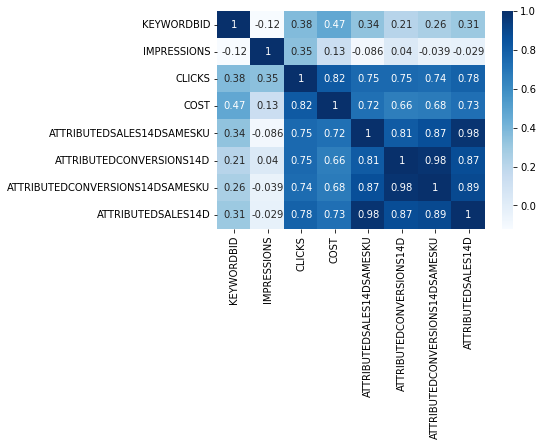

In [61]:
import seaborn as sb
corr = keywords_report_df2.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

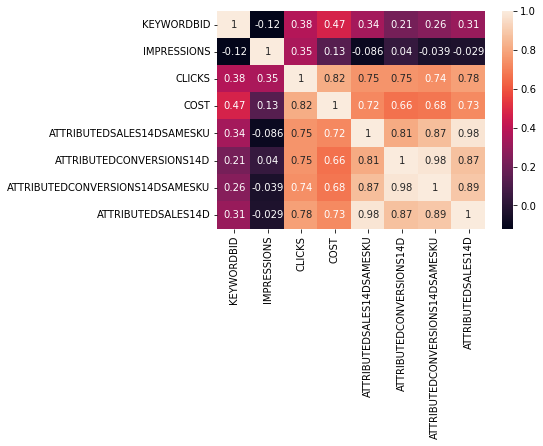

In [62]:
import seaborn as sns
Var_Corr = keywords_report_df2.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
cmap=sns.diverging_palette(5, 500, as_cmap=True)

In [57]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
 
corr = keywords_report_df2.corr()
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,KEYWORDBID,IMPRESSIONS,CLICKS,COST,ATTRIBUTEDSALES14DSAMESKU,ATTRIBUTEDCONVERSIONS14D,ATTRIBUTEDCONVERSIONS14DSAMESKU,ATTRIBUTEDSALES14D
KEYWORDBID,1.00,-0.12,0.38,0.47,0.34,0.21,0.26,0.31
IMPRESSIONS,-0.12,1.00,0.35,0.14,-0.09,0.04,-0.04,-0.03
CLICKS,0.38,0.35,1.00,0.82,0.75,0.75,0.74,0.78
COST,0.47,0.14,0.82,1.00,0.72,0.66,0.68,0.72
ATTRIBUTEDSALES14DSAMESKU,0.34,-0.09,0.75,0.72,1.00,0.81,0.87,0.98
ATTRIBUTEDCONVERSIONS14D,0.21,0.04,0.75,0.66,0.81,1.00,0.98,0.87
ATTRIBUTEDCONVERSIONS14DSAMESKU,0.26,-0.04,0.74,0.68,0.87,0.98,1.00,0.89
ATTRIBUTEDSALES14D,0.31,-0.03,0.78,0.72,0.98,0.87,0.89,1.00


In [94]:
# dataframe_query = f'''
#         select * from ams.keywords_report limit 1000;
#         '''
dataframe_query = f'''
        select 
        case MATCH_TYPE
        when 'BROAD' then 1
        when 'PHRASE' then 0.72
        when 'EXACT' then 0.87
        else 0 end as MATCH_TYPE,
        NVL(ATTRIBUTEDUNITSORDERED30D,0) as ATTRIBUTEDUNITSORDERED30D,
        NVL(ATTRIBUTEDUNITSORDERED30DOTHERSKU,0) as ATTRIBUTEDUNITSORDERED30DOTHERSKU,
        NVL(ATTRIBUTEDSALES30DOTHERSKU,0) as ATTRIBUTEDSALES30DOTHERSKU
        from ams.asins_report 
        order by ATTRIBUTEDUNITSORDERED30DOTHERSKU desc
        limit 2000;
        '''
keywords_report_df3 = snowflake_db_connector.getResultForQuery(dataframe_query)
keywords_report_df3

,MATCH_TYPE,ATTRIBUTEDUNITSORDERED30D,ATTRIBUTEDUNITSORDERED30DOTHERSKU,ATTRIBUTEDSALES30DOTHERSKU
0,0.72,0.00,181.00,1813.62
1,0.87,0.00,116.00,1983.87
2,0.87,0.00,108.00,657.95
3,0.87,0.00,100.00,407.00
4,0.87,0.00,92.00,552.98
...,...,...,...,...
1995,0.87,0.00,7.00,45.01
1996,0.87,0.00,7.00,74.06
1997,0.72,0.00,7.00,29.89
1998,0.87,0.00,7.00,21.96


In [95]:
keywords_report_df3['MATCH_TYPE']=keywords_report_df3['MATCH_TYPE'].astype(str).astype(float)
keywords_report_df3['ATTRIBUTEDUNITSORDERED30D']=keywords_report_df3['ATTRIBUTEDUNITSORDERED30D'].astype(str).astype(float)
keywords_report_df3['ATTRIBUTEDUNITSORDERED30DOTHERSKU']=keywords_report_df3['ATTRIBUTEDUNITSORDERED30DOTHERSKU'].astype(str).astype(float)
keywords_report_df3['ATTRIBUTEDSALES30DOTHERSKU']=keywords_report_df3['ATTRIBUTEDSALES30DOTHERSKU'].astype(str).astype(float)

<AxesSubplot:>

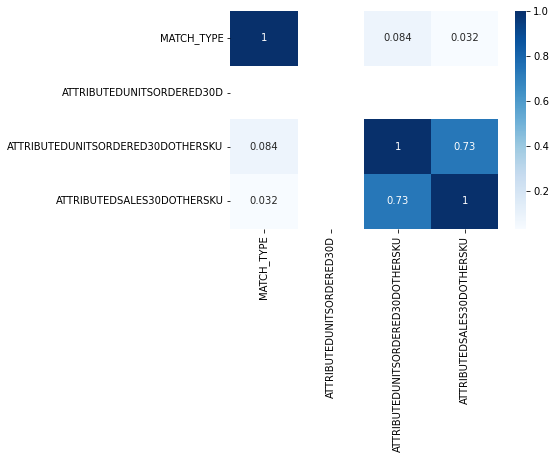

In [96]:
import seaborn as sb
corr = keywords_report_df3.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

In [97]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
 
corr = keywords_report_df3.corr()
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,MATCH_TYPE,ATTRIBUTEDUNITSORDERED30D,ATTRIBUTEDUNITSORDERED30DOTHERSKU,ATTRIBUTEDSALES30DOTHERSKU
MATCH_TYPE,1.00,nan,0.08,0.03
ATTRIBUTEDUNITSORDERED30D,nan,nan,nan,nan
ATTRIBUTEDUNITSORDERED30DOTHERSKU,0.08,nan,1.00,0.73
ATTRIBUTEDSALES30DOTHERSKU,0.03,nan,0.73,1.00


In [83]:
# dataframe_query = f'''
#         select * from ams.keywords_report limit 1000;
#         '''
dataframe_query = f'''
        select 
        distinct CAMPAIGN_STATUS,PLACEMENT
        from ams.campaigns_report 
        limit 2000;
        '''
keywords_report_df4 = snowflake_db_connector.getResultForQuery(dataframe_query)
keywords_report_df4

,CAMPAIGN_STATUS,PLACEMENT
0,paused,Other on-Amazon
1,enabled,Other on-Amazon
2,enabled,Top of Search on-Amazon
3,enabled,Detail Page on-Amazon
4,paused,Detail Page on-Amazon
5,paused,Top of Search on-Amazon
6,archived,Top of Search on-Amazon
7,archived,Other on-Amazon
8,archived,Detail Page on-Amazon


In [91]:
dataframe_query = f'''
        select 
        CAMPAIGN_BUDGET,
        case PLACEMENT
        when 'Top of Search on-Amazon' then 1
        when 'Other on-Amazon' then 0.5
        when 'Detail Page on-Amazon' then 0.75 end as PLACEMENT,
        CLICKS,IMPRESSIONS,COST,ATTRIBUTEDCONVERSIONS30D,ATTRIBUTEDCONVERSIONS30DSAMESKU,
        ATTRIBUTEDUNITSORDERED30D,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES30DSAMESKU
        from ams.campaigns_report 
        order by CLicks desc
        limit 2000;
        '''
keywords_report_df4 = snowflake_db_connector.getResultForQuery(dataframe_query)
keywords_report_df4



,CAMPAIGN_BUDGET,PLACEMENT,CLICKS,IMPRESSIONS,COST,ATTRIBUTEDCONVERSIONS30D,ATTRIBUTEDCONVERSIONS30DSAMESKU,ATTRIBUTEDUNITSORDERED30D,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES30DSAMESKU
0,18000.00,1.00,4621,205831,14351.31,1342.00,1129.00,1545.00,17334.60,15915.91
1,18000.00,1.00,4245,262448,13237.73,1372.00,1102.00,1597.00,15219.19,13464.00
2,4000.00,1.00,4076,101502,68335.62,688.00,635.00,716.00,31656.42,30765.49
3,18000.00,1.00,3917,255097,12322.92,1099.00,838.00,1278.00,12404.40,10720.70
4,18000.00,1.00,3869,180805,12171.06,1295.00,1063.00,1580.00,15281.05,13730.65
...,...,...,...,...,...,...,...,...,...,...
1995,2200.00,1.00,300,5566,1849.52,143.00,131.00,145.00,1470.52,1309.48
1996,2200.00,1.00,300,5776,1844.34,142.00,136.00,149.00,1461.95,1395.17
1997,332.64,1.00,300,3506,128.46,201.00,195.00,221.00,2218.77,2149.93
1998,140.00,1.00,300,3606,317.71,169.00,158.00,180.00,2002.56,1832.03


In [92]:
keywords_report_df4['CAMPAIGN_BUDGET']=keywords_report_df4['CAMPAIGN_BUDGET'].astype(str).astype(float)
keywords_report_df4['PLACEMENT']=keywords_report_df4['PLACEMENT'].astype(str).astype(float)
keywords_report_df4['CLICKS']=keywords_report_df4['CLICKS'].astype(str).astype(float)
keywords_report_df4['IMPRESSIONS']=keywords_report_df4['IMPRESSIONS'].astype(str).astype(float)
keywords_report_df4['COST']=keywords_report_df4['COST'].astype(str).astype(float)
keywords_report_df4['ATTRIBUTEDCONVERSIONS30D']=keywords_report_df4['ATTRIBUTEDCONVERSIONS30D'].astype(str).astype(float)
keywords_report_df4['ATTRIBUTEDCONVERSIONS30DSAMESKU']=keywords_report_df4['ATTRIBUTEDCONVERSIONS30DSAMESKU'].astype(str).astype(float)
keywords_report_df4['ATTRIBUTEDUNITSORDERED30D']=keywords_report_df4['ATTRIBUTEDUNITSORDERED30D'].astype(str).astype(float)
keywords_report_df4['ATTRIBUTEDSALES30D']=keywords_report_df4['ATTRIBUTEDSALES30D'].astype(str).astype(float)
keywords_report_df4['ATTRIBUTEDSALES30DSAMESKU']=keywords_report_df4['ATTRIBUTEDSALES30DSAMESKU'].astype(str).astype(float)


,CAMPAIGN_BUDGET,PLACEMENT,CLICKS,IMPRESSIONS,COST,ATTRIBUTEDCONVERSIONS30D,ATTRIBUTEDCONVERSIONS30DSAMESKU,ATTRIBUTEDUNITSORDERED30D,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES30DSAMESKU
CAMPAIGN_BUDGET,1.00,-0.26,0.44,0.06,0.45,0.38,0.34,0.38,0.27,0.23
PLACEMENT,-0.26,1.00,0.17,-0.32,0.10,0.28,0.34,0.28,0.32,0.33
CLICKS,0.44,0.17,1.00,0.04,0.80,0.67,0.68,0.66,0.84,0.83
IMPRESSIONS,0.06,-0.32,0.04,1.00,-0.02,-0.14,-0.17,-0.13,-0.12,-0.13
COST,0.45,0.10,0.80,-0.02,1.00,0.49,0.49,0.47,0.73,0.72
ATTRIBUTEDCONVERSIONS30D,0.38,0.28,0.67,-0.14,0.49,1.00,0.99,1.00,0.74,0.68
ATTRIBUTEDCONVERSIONS30DSAMESKU,0.34,0.34,0.68,-0.17,0.49,0.99,1.00,0.98,0.77,0.72
ATTRIBUTEDUNITSORDERED30D,0.38,0.28,0.66,-0.13,0.47,1.00,0.98,1.00,0.73,0.68
ATTRIBUTEDSALES30D,0.27,0.32,0.84,-0.12,0.73,0.74,0.77,0.73,1.00,0.99
ATTRIBUTEDSALES30DSAMESKU,0.23,0.33,0.83,-0.13,0.72,0.68,0.72,0.68,0.99,1.00


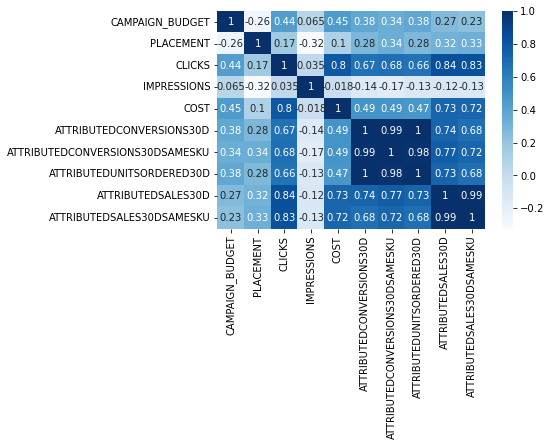

In [100]:
import seaborn as sb
corr = keywords_report_df4.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
 
corr = keywords_report_df4.corr()
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


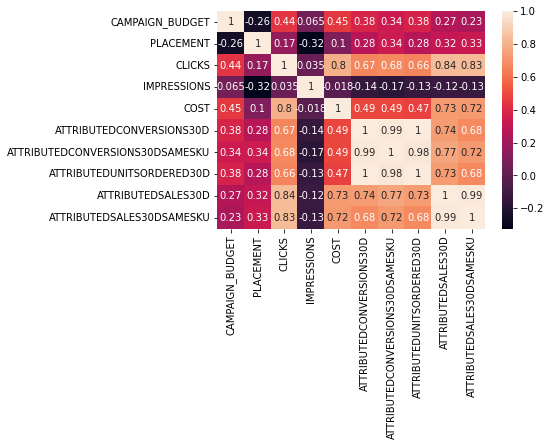

In [99]:
import seaborn as sns
Var_Corr = keywords_report_df4.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
cmap=sns.diverging_palette(5, 500, as_cmap=True)